In [17]:
# Import built-in libraries
import os
from os.path import abspath

# Import external libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import linregress

# Import internal libraries
from src.plot_confusion_matrix import plot_confusion_matrix

In [2]:
# Load all data
demo = pd.read_csv(abspath("../data/T_demo.csv"))
stage = pd.read_csv(abspath("../data/T_stage.csv"))

# Biomarkers
cre = pd.read_csv(abspath("../data/T_creatinine.csv"))
dbp = pd.read_csv(abspath("../data/T_DBP.csv"))
sbp = pd.read_csv(abspath("../data/T_SBP.csv"))
hgb = pd.read_csv(abspath("../data/T_HGB.csv"))
glu = pd.read_csv(abspath("../data/T_glucose.csv"))
ldl = pd.read_csv(abspath("../data/T_ldl.csv"))

# Medication
meds = pd.read_csv(abspath("../data/T_meds.csv"))

In [3]:
# Group values by patient id
# Calculate the difference between the latest and first measurement for all biomarkers
cre_s = pd.Series({i:(data.iloc[-1]-data.iloc[0]).value for i, data in cre.groupby("id")}, name="cre")
dbp_s = pd.Series({i:(data.iloc[-1]-data.iloc[0]).value for i, data in dbp.groupby("id")}, name="dbp")
sbp_s = pd.Series({i:(data.iloc[-1]-data.iloc[0]).value for i, data in sbp.groupby("id")}, name="sbp")
hgb_s = pd.Series({i:(data.iloc[-1]-data.iloc[0]).value for i, data in hgb.groupby("id")}, name="hgb")
glu_s = pd.Series({i:(data.iloc[-1]-data.iloc[0]).value for i, data in glu.groupby("id")}, name="glu")
ldl_s = pd.Series({i:(data.iloc[-1]-data.iloc[0]).value for i, data in ldl.groupby("id")}, name="ldl")


# Create a new data frame with the differences
biomarkers_diff = pd.concat([cre_s, dbp_s, sbp_s, hgb_s, glu_s, ldl_s], axis=1)
biomarkers_diff

,cre,dbp,sbp,hgb,glu,ldl
0,-0.06,-11.03,13.39,-0.38,-0.46,-3.59
1,0.46,18.50,-7.80,-1.04,-0.18,-16.33
2,-0.31,10.39,3.57,-0.15,-0.20,25.52
3,0.16,-12.64,-4.58,-1.08,-0.66,1.71
4,-0.41,22.34,37.67,-1.58,2.24,6.30
...,...,...,...,...,...,...
295,-0.31,-0.30,-16.35,0.61,-0.64,12.02
296,-0.47,5.84,3.50,0.19,0.69,-8.61
297,0.06,13.68,-8.77,0.43,1.28,17.05
298,-0.06,-16.14,-6.19,1.96,-0.44,-16.98


In [4]:
# Group values by patient id
# get a linear regression and calculate the slope for each patient
cre_s = pd.Series({i:linregress(data.time, data.value).slope for i, data in cre.groupby("id")}, name="cre")
dbp_s = pd.Series({i:linregress(data.time, data.value).slope for i, data in dbp.groupby("id")}, name="dbp")
sbp_s = pd.Series({i:linregress(data.time, data.value).slope for i, data in sbp.groupby("id")}, name="sbp")
hgb_s = pd.Series({i:linregress(data.time, data.value).slope for i, data in hgb.groupby("id")}, name="hgb")
glu_s = pd.Series({i:linregress(data.time, data.value).slope for i, data in glu.groupby("id")}, name="glu")
ldl_s = pd.Series({i:linregress(data.time, data.value).slope for i, data in ldl.groupby("id")}, name="ldl")

# Create a new data frame with the slopes
biomarkers_slop = pd.concat([cre_s, dbp_s, sbp_s, hgb_s, glu_s, ldl_s], axis=1)
biomarkers_slop

,cre,dbp,sbp,hgb,glu,ldl
0,-0.000139,-0.006528,0.030778,-0.000087,-0.001550,0.026001
1,0.000447,0.015015,-0.002471,-0.001088,0.000395,-0.031092
2,-0.000331,0.014118,0.007067,-0.000721,0.000538,0.049298
3,-0.000069,-0.008269,-0.011189,-0.000519,-0.001384,-0.008558
4,-0.000387,0.040116,0.051763,-0.001118,0.001765,0.003691
...,...,...,...,...,...,...
295,-0.000386,-0.004818,-0.012507,0.000619,-0.001355,0.005764
296,-0.000728,0.006951,0.006744,0.000163,0.001433,0.000888
297,-0.000004,0.027620,0.026806,-0.000042,0.001389,0.007881
298,-0.000134,-0.039152,0.010510,0.001009,-0.000869,-0.033715


In [5]:
# Group values by patient id
# Get the mean value for each patient across all time points

cre_s = pd.Series({i:data.value.mean() for i, data in cre.groupby("id")}, name="cre")
dbp_s = pd.Series({i:data.value.mean() for i, data in dbp.groupby("id")}, name="dbp")
sbp_s = pd.Series({i:data.value.mean() for i, data in sbp.groupby("id")}, name="sbp")
hgb_s = pd.Series({i:data.value.mean() for i, data in hgb.groupby("id")}, name="hgb")
glu_s = pd.Series({i:data.value.mean() for i, data in glu.groupby("id")}, name="glu")
ldl_s = pd.Series({i:data.value.mean() for i, data in ldl.groupby("id")}, name="ldl")

# Create a new data frame  with the means
biomarkers_mean = pd.concat([cre_s, dbp_s, sbp_s, hgb_s, glu_s, ldl_s], axis=1)
biomarkers_mean

,cre,dbp,sbp,hgb,glu,ldl
0,1.236667,83.173750,139.610000,13.262222,6.456667,143.593333
1,1.838000,80.455714,150.232857,13.662857,9.240000,82.424000
2,2.170000,89.217500,140.210000,15.700000,6.466667,75.283333
3,0.996000,74.857143,139.588571,13.198000,6.525000,98.246000
4,1.150000,97.385714,160.667143,12.658000,9.720000,65.907500
...,...,...,...,...,...,...
295,1.774000,83.420000,139.603750,14.106250,5.877143,118.198000
296,1.432000,88.365714,131.017143,14.784000,8.354000,102.960000
297,1.241667,70.895000,125.318750,14.190000,8.275000,130.898333
298,1.116000,76.475000,125.255000,16.360000,5.867500,78.074000


In [6]:
# Binarize medication labels
# First let's create a dataframe with drugs as columns
meds_bin = pd.DataFrame()

# Iterate over the medications table grouping it by drug
for i,data in meds.groupby("drug"):

    # Create an empty array
    drug = np.zeros(demo.id.shape, dtype=bool)

    # For each drug, get the patients that are taking it
    # Change the value of the array to true only for the patients taking the drug
    drug[data.id.unique()]=True

    # Add a column for the specific drug to the binarized meds dataframe
    meds_bin[i]=drug

meds_bin

,atenolol,atorvastatin,bisoprolol,canagliflozin,carvedilol,dapagliflozin,irbesartan,labetalol,losartan,lovastatin,...,metoprolol,nebivolol,olmesartan,pitavastatin,pravastatin,propranolol,rosuvastatin,simvastatin,telmisartan,valsartan
0,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
296,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,True,False,False,False,...,True,False,False,True,False,False,False,False,False,True
298,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Binarize sex
sex = pd.get_dummies(demo.gender)["Male"].rename({"Male":"Sex"})

# Binarize race remove unknown
race = pd.get_dummies(demo.race).drop("Unknown", axis=1)

In [8]:
# Let's first split the data into a training and a test set
# To do so we split the stage progression and take 15 ids each
# This way we have a 90:10 train-test split with a balanced test set

# Merging all data together
all_data = pd.concat([demo.age, sex, race, biomarkers_diff, biomarkers_slop, biomarkers_mean, meds_bin, stage.drop("id", axis=1)], axis=1)

# Separating progression trues and falses
true = all_data[all_data.Stage_Progress]
false = all_data[~all_data.Stage_Progress]

# Specify the test size
true_train, true_test = train_test_split(true, test_size=15, random_state=42)
false_train, false_test = train_test_split(false, test_size=15, random_state=42)

# Concatenate together true and false so we have only train, test
train = pd.concat([true_train, false_train])#.sort_values(by="id")
test = pd.concat([true_test, false_test])#.sort_values(by="id")

print(train.shape)
print(test.shape)

(270, 46)
(30, 46)


In [9]:
print(f"Data points in train test {train.shape[0]}")
print(f"Data points in train test {test.shape[0]}")

Data points in train test 270
Data points in train test 30


In [10]:
%%time
# Train a random forest
model = RandomForestClassifier(bootstrap=True, n_estimators=100000, oob_score=True, class_weight="balanced")
model.fit(train.drop("Stage_Progress", axis=1), train["Stage_Progress"].values.ravel())

C:\Users\darkg\anaconda3\envs\stable\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Wall time: 3min 33s


RandomForestClassifier(class_weight='balanced', n_estimators=100000,
                       oob_score=True)

In [11]:
print(f"Model Out of the bag score = {model.oob_score_}")
print(f"Model accuracy = {model.score(test.drop('Stage_Progress', axis=1), test['Stage_Progress'].values.ravel())}")


Model Out of the bag score = 0.7888888888888889
Model accuracy = 0.8


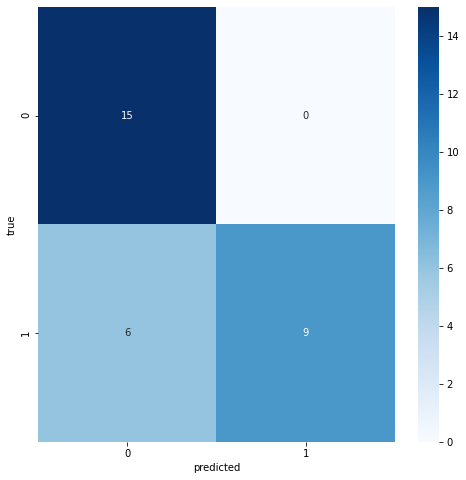

In [12]:
predicted = model.predict(test.drop("Stage_Progress", axis=1))
cm = confusion_matrix(test["Stage_Progress"], predicted)
plot_confusion_matrix(cm)
plt.show()

In [13]:
accuracy_score(test["Stage_Progress"], predicted)

0.8

In [15]:
# Get feature importance
fi = pd.Series(model.feature_importances_, index=train.drop("Stage_Progress", axis=1).columns)

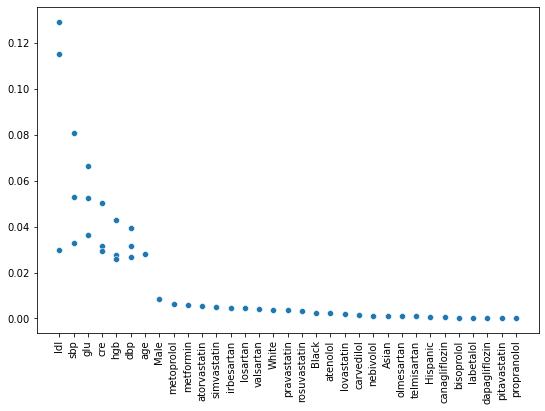

In [16]:

# Visualize feature importance
fi = fi.sort_values(ascending=False)

fig,ax = plt.subplots(1,1,figsize=(9,6))
sns.scatterplot(data=fi, ax=ax)
plt.xticks(rotation=90)
plt.show()

In [18]:

print(classification_report(test["Stage_Progress"], predicted))

              precision    recall  f1-score   support

       False       0.71      1.00      0.83        15
        True       1.00      0.60      0.75        15

    accuracy                           0.80        30
   macro avg       0.86      0.80      0.79        30
weighted avg       0.86      0.80      0.79        30

